# Basic SHAP Interaction Value Example in XGBoost

This notebook shows how the SHAP interaction values for a very simple function are computed. We start with a simple linear function, and then add an interaction term to see how it changes the SHAP values and the SHAP interaction values.

In [116]:
import xgboost
import numpy as np
import shap
import pandas as pd 

## Explain a linear function with no interactions

In [117]:
data1 = pd.read_csv("agaricus-lepiota_03.csv")
#print (data1.head())
#data1.info()
#data1.describe()
#Change the data from string to acceptable format:
for col in data1.select_dtypes(include=['object']).columns:
    data1[col] = data1[col].astype('category')

# Encoding categorical features
for col in data1.select_dtypes(include=['category']).columns:
    data1[col] = data1[col].cat.codes

data1.fillna((-999), inplace=True)

#print (data1.head())
#data1.info()
#data1.describe()

In [118]:
# Split data into train and test:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

#X,y = shap.datasets.adult()
#X_display,y_display = shap.datasets.adult(display=True)

X, y = data1.iloc[:,:-1],data1.iloc[:,-1]

data1_dmatrix = xgb.DMatrix(data=X,label=y)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=123)

/home/tegwyn/.local/lib/python3.5/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/tegwyn/.local/lib/python3.5/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


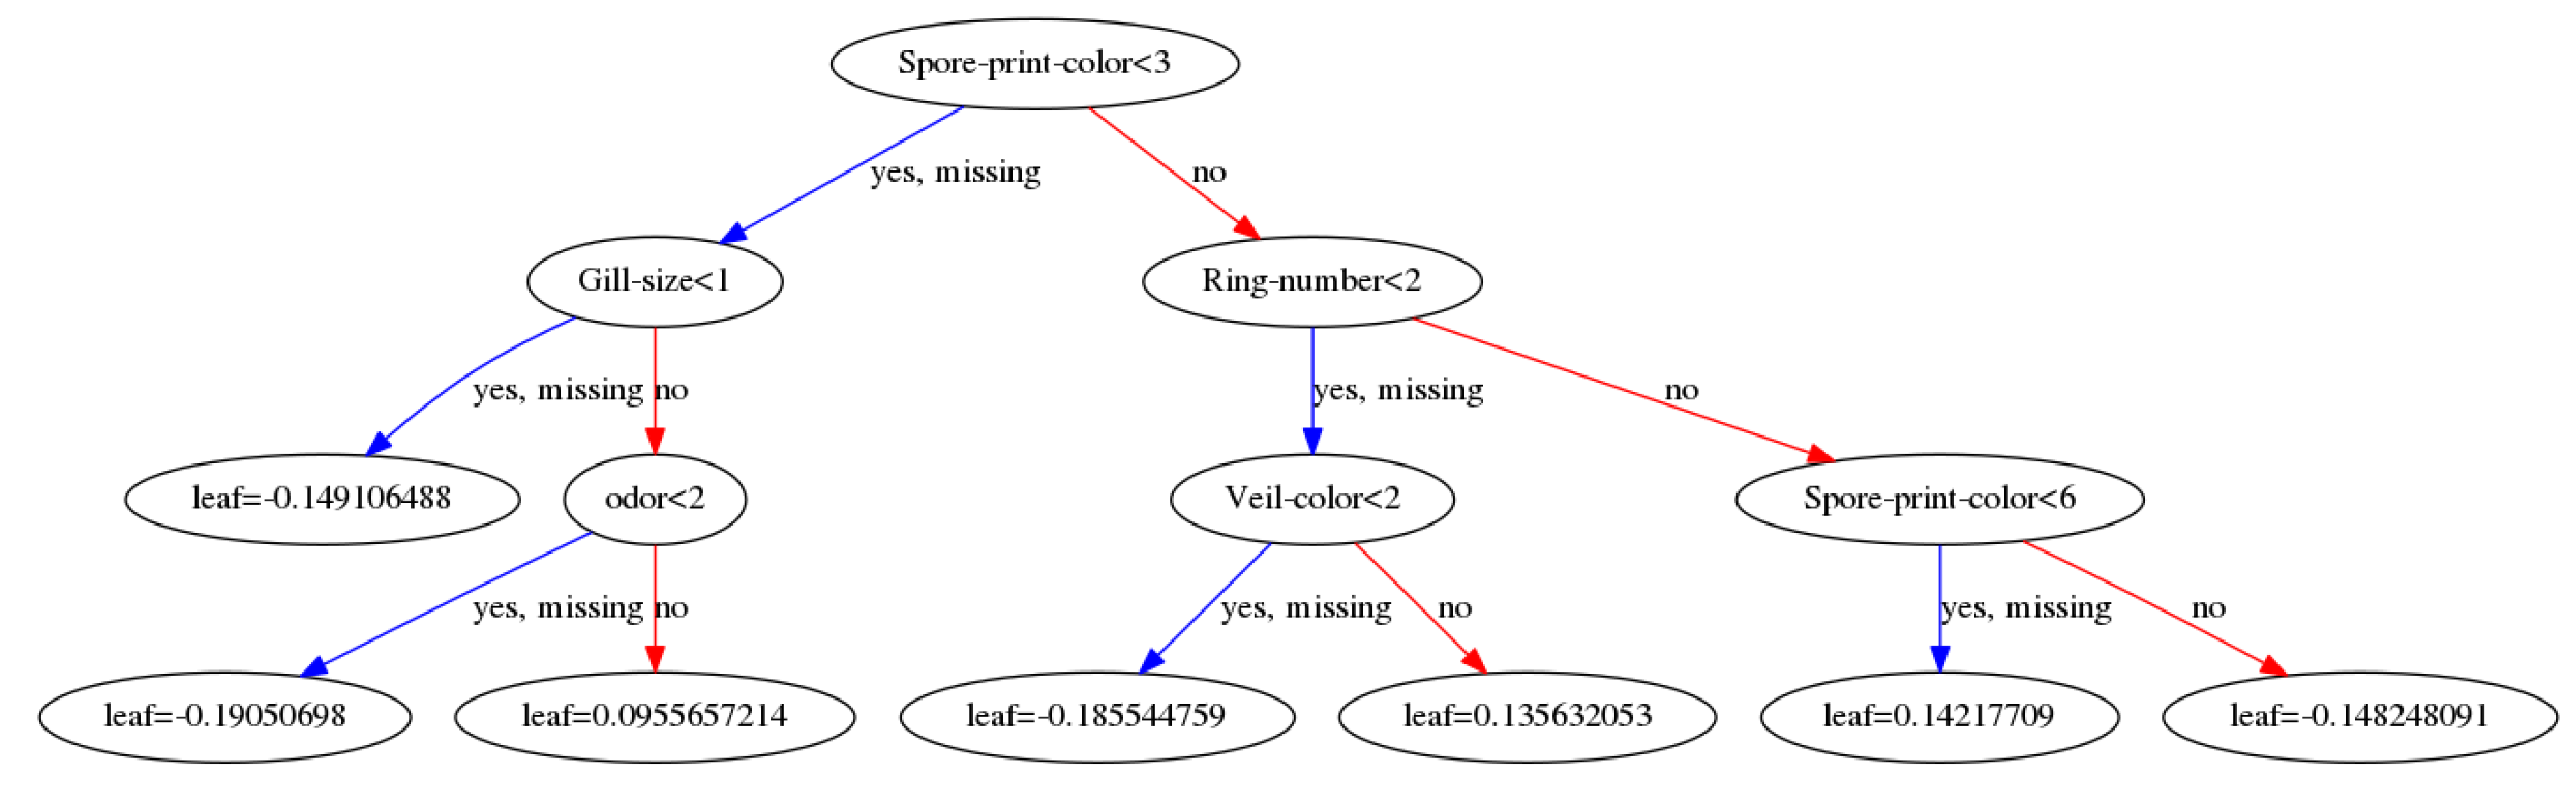

In [119]:
# plot decision tree
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
# load data
#dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
#X = dataset[:,0:8]
#y = dataset[:,8]
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot single tree
plt.rcParams['figure.figsize'] = [50, 50]
plot_tree(model, num_trees=4)
#plot_tree(model)
plt.show()

In [120]:
# ensure the variables are independent
np.cov(X.T)

array([[ 8.12318578e-01, -7.50499475e-03, -5.48153383e-01,
         8.87077578e-02,  4.48852221e-01,  4.59115399e-03,
        -2.03546979e-02,  1.07892119e-01, -2.08402896e-01,
         1.10973254e-01,  3.14414038e-01, -5.20883586e-02,
        -5.39155099e-02, -1.15293100e-01, -1.33452598e-01,
         0.00000000e+00,  8.09125428e-03, -1.69171514e-02,
         1.24169185e-01,  6.39676786e-01,  1.45574932e-01,
         3.06117302e-01],
       [-7.50499475e-03,  1.39152408e+00, -9.31381632e-02,
         1.13644154e-02, -2.47453890e-01, -3.02811045e-02,
        -4.17080737e-02,  1.49898414e-01, -4.84663513e-01,
         2.17076045e-02,  8.22388277e-01,  1.48223283e-02,
        -9.60127261e-05,  6.33812009e-01,  6.73325610e-01,
         0.00000000e+00, -4.43142373e-02,  1.93225611e-02,
        -2.04828604e-01,  1.03379739e+00, -2.79119905e-01,
        -5.72005271e-01],
       [-5.48153383e-01, -9.31381632e-02,  1.18638285e+01,
        -5.85881292e-02, -2.17894917e+00,  1.05125207e-01,
    

In [121]:
# and mean centered
X.mean(0)

Cap-shape                   2.491876
Cap-surface                 1.742984
Cap-color                   4.323486
bruises                     0.584441
odor                        4.788282
Gill-attachment             0.974151
Gill-spacing                0.161497
Gill-size                   0.309207
Gill-color                  4.729444
Stalk-shape                 0.567208
Stalk-root                  1.636140
Stalk-surface-above-ring    2.498277
Stalk-surface-below-ring    2.424914
Stalk-color-above-ring      5.446578
Stalk-color-below-ring      5.393402
Veil-type                   0.000000
Veil-color                  1.965534
Ring-number                 1.069424
Ring-type                   1.827671
Spore-print-color           3.062038
population                  3.644018
habitat                     3.221073
dtype: float64

In [122]:
# train a model with single tree
#params = 
{
    "num_round": 4, "eta": 0.01, "objective": "binary:logistic", "subsample": 0.5, "base_score": np.mean(y_train), "eval_metric": "logloss"
}

#"num_round": 4,
#"max_depth": 5,

Xd = xgboost.DMatrix(X, label=y)
model = xgboost.train(
    {
    #'eta':1, 'max_depth':3, 'base_score': 0, "lambda": 0
    "num_round": 2, "max_depth": 5, "eta": 0.01, "objective": "binary:logistic", "subsample": 0.5, "base_score": np.mean(y_train), "eval_metric": "logloss"
    }, Xd, 1)
print("Model error =", np.linalg.norm(y-model.predict(Xd)))
print(model.get_dump(with_stats=True)[0])

/home/tegwyn/.local/lib/python3.5/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/tegwyn/.local/lib/python3.5/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Model error = 44.60049092650706
0:[Spore-print-color<3] yes=1,no=2,missing=1,gain=1946.44812,cover=1030.4259
	1:[Gill-size<1] yes=3,no=4,missing=3,gain=613.864868,cover=492.36731
		3:leaf=-0.0192618761,cover=414.966766
		4:[Cap-surface<1] yes=7,no=8,missing=7,gain=65.8927536,cover=77.4005432
			7:[odor<4] yes=13,no=14,missing=13,gain=66.5699615,cover=26.465992
				13:[bruises<1] yes=19,no=20,missing=19,gain=28.1559124,cover=14.2317123
					19:leaf=-0.0137865767,cover=2.4967916
					20:leaf=0.0191142689,cover=11.7349205
				14:leaf=-0.0178493336,cover=12.2342787
			8:[odor<2] yes=15,no=16,missing=15,gain=44.9297485,cover=50.9345474
				15:leaf=-0.0147607028,cover=3.24582911
				16:leaf=0.0203170702,cover=47.6887207
	2:[Ring-number<2] yes=5,no=6,missing=5,gain=764.674927,cover=538.058594
		5:[Veil-color<2] yes=9,no=10,missing=9,gain=160.704224,cover=458.161255
			9:leaf=-0.0177618042,cover=11.4852419
			10:[Gill-spacing<1] yes=17,no=18,missing=17,gain=147.57019,cover=446.676025
				17:[S

OSError: [Errno 12] Cannot allocate memory

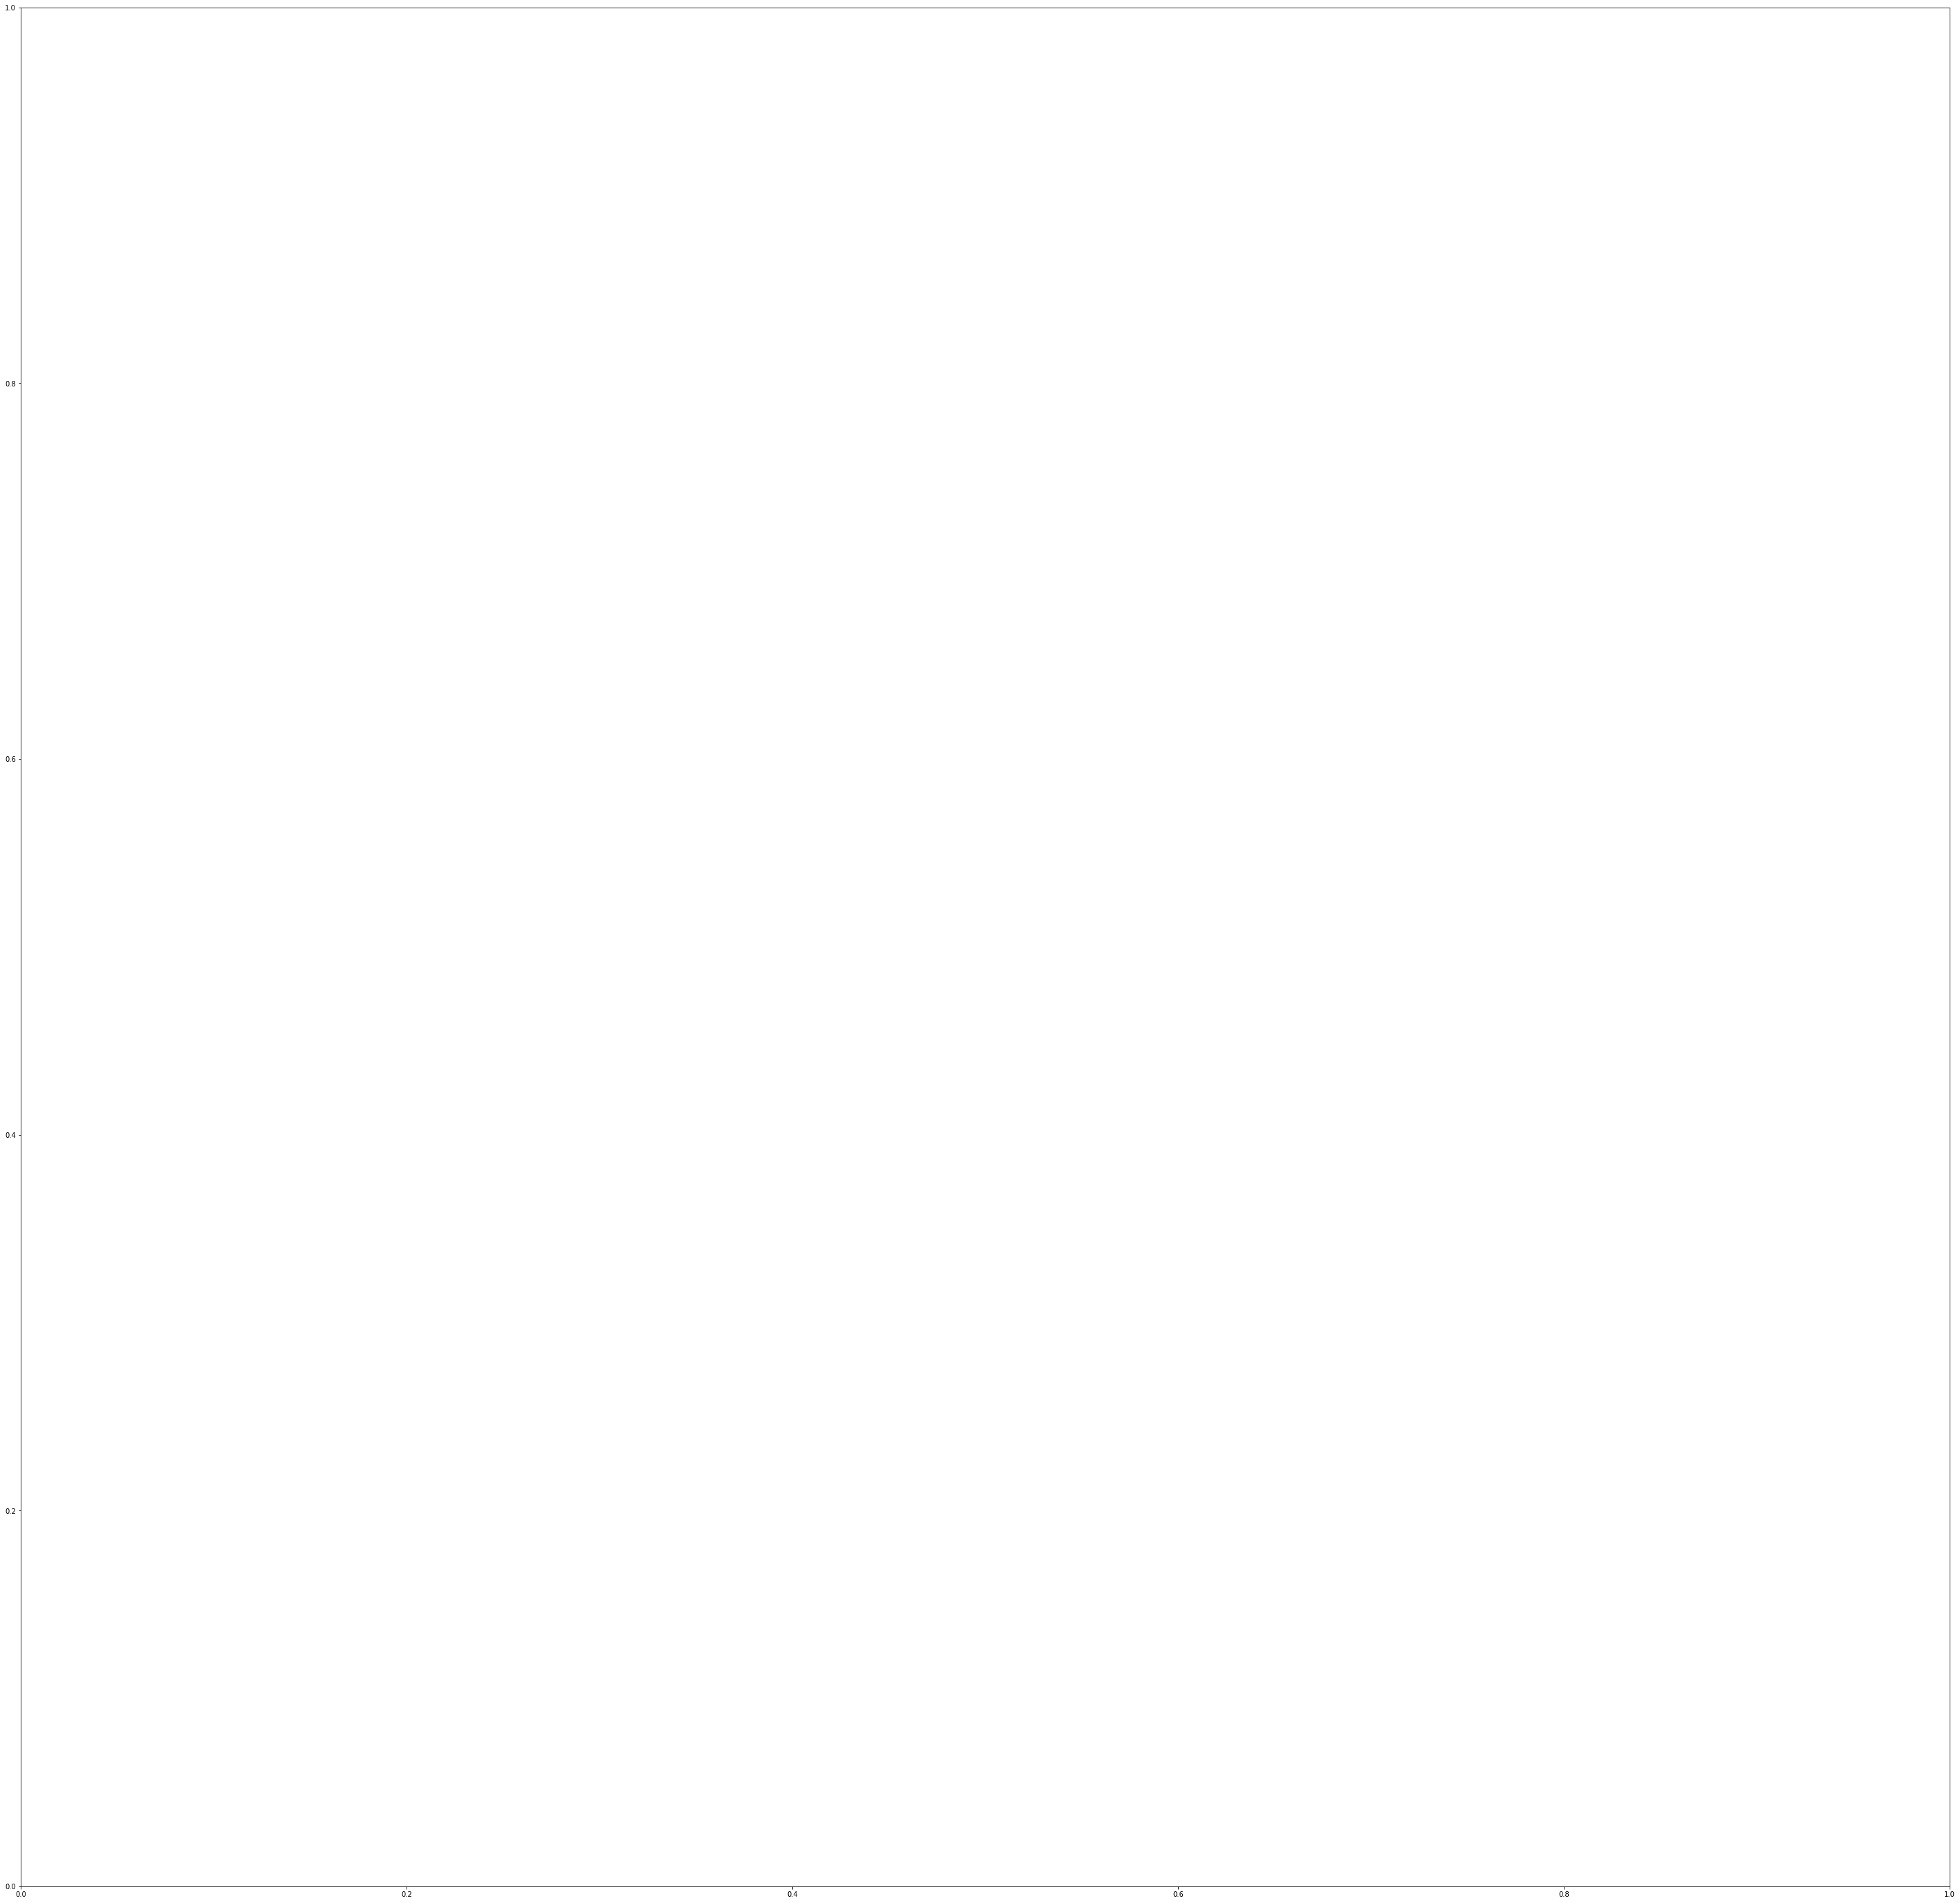

In [127]:
# plot decision tree
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
# load data
#dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
#X = dataset[:,0:8]
#y = dataset[:,8]
# fit model no training data
model = XGBClassifier(max_depth=5, learning_rate=0.1, verbosity=1, objective='binary:logistic', booster='gbtree', 
              gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, 
              colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
              base_score=0.5, random_state=0)

# , importance_type='weight'
#importance_type (string, default "gain") 
#The feature importance type for the feature_importances_ property: 
#either “gain”, “weight”, “cover”, “total_gain” or “total_cover”.

#model = XGBClassifier()
model.fit(X, y)
# plot single tree
plt.rcParams['figure.figsize'] = [50, 50]
#plot_tree(model, num_trees=0)
plot_tree(model, num_trees=1)
#plot_tree(model, num_trees=2)
#plot_tree(model, num_trees=3)
#plot_tree(model, num_trees=4)

plt.show()

In [32]:
# make sure the SHAP values add up to marginal predictions
pred = model.predict(Xd, output_margin=True)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xd)
np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()

7.450581e-09

If we build a summary plot we see that only features 1 and 2 have any effect, and that their effects only have two possible magnitudes (one for -0.5 and for 0.5).

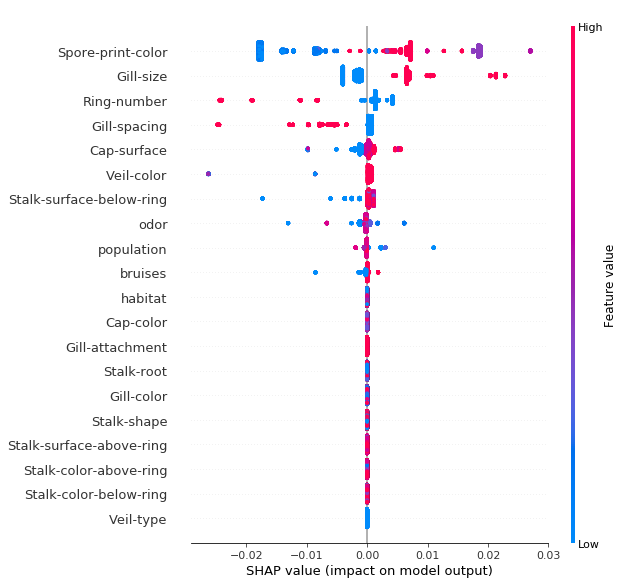

In [33]:
shap.summary_plot(shap_values, X)

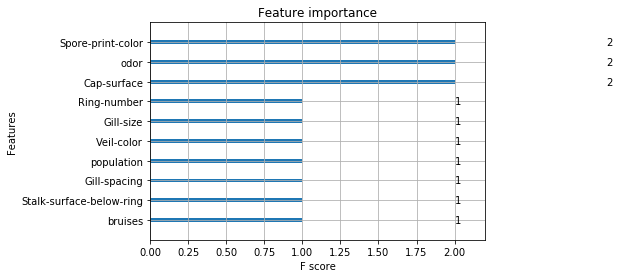

In [36]:
xgboost.plot_importance(model)
#pl.title("xgboost.plot_importance(model)")
#pl.show()

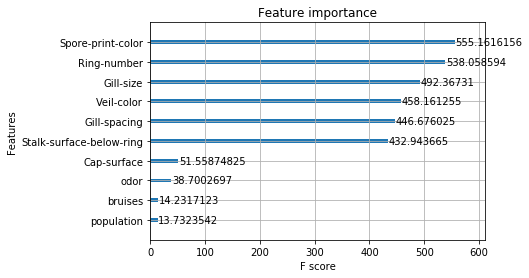

In [37]:
xgboost.plot_importance(model, importance_type="cover")

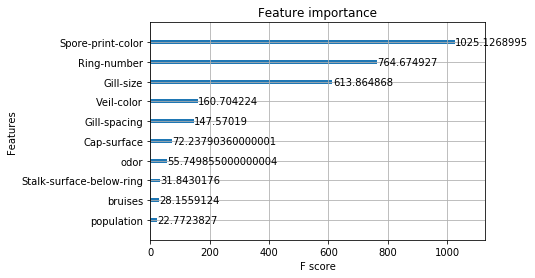

In [38]:
xgboost.plot_importance(model, importance_type="gain")

In [62]:

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
# print the JS visualization code to the notebook
shap.initjs()

In [63]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [65]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_train.iloc[:1000,:])

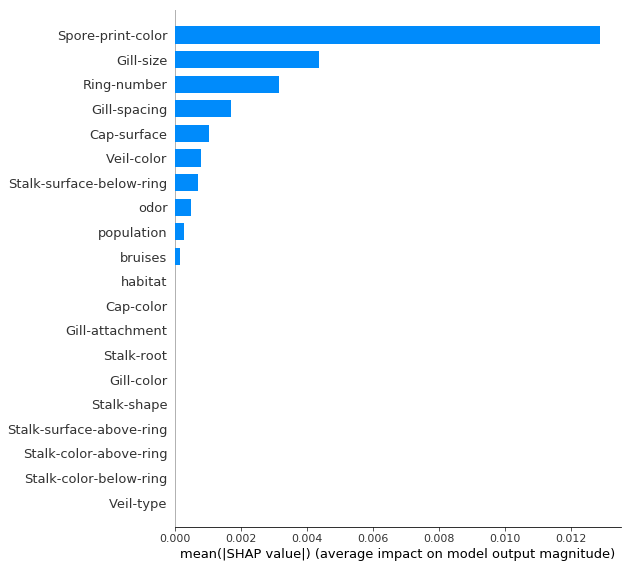

In [66]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

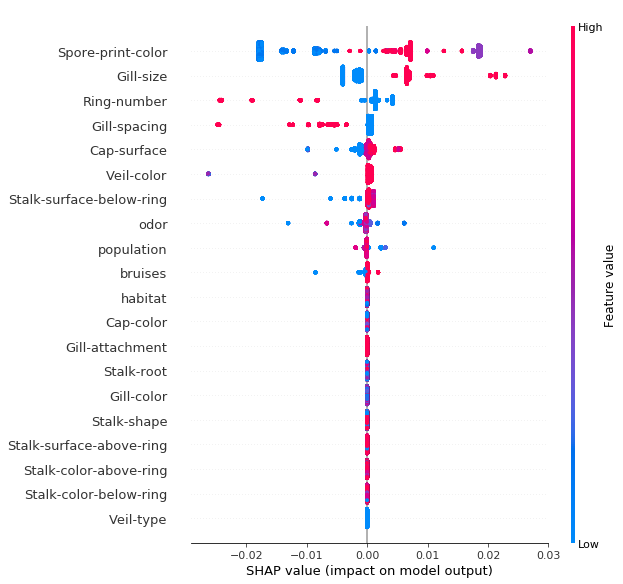

In [70]:
shap.summary_plot(shap_values, X)

for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X, display_features=100)

In [73]:
#for name in X_train.columns:
    #shap.dependence_plot(name, shap_values, X, display_features=X_display)

In [77]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

shap_pca50 = PCA(n_components=12).fit_transform(shap_values[:1000,:])
shap_embedded = TSNE(n_components=2, perplexity=50).fit_transform(shap_values[:1000,:])

In [78]:
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
cdict1 = {
    'red': ((0.0, 0.11764705882352941, 0.11764705882352941),
            (1.0, 0.9607843137254902, 0.9607843137254902)),

    'green': ((0.0, 0.5333333333333333, 0.5333333333333333),
              (1.0, 0.15294117647058825, 0.15294117647058825)),

    'blue': ((0.0, 0.8980392156862745, 0.8980392156862745),
             (1.0, 0.3411764705882353, 0.3411764705882353)),

    'alpha': ((0.0, 1, 1),
              (0.5, 1, 1),
              (1.0, 1, 1))
}  # #1E88E5 -> #ff0052
red_blue_solid = LinearSegmentedColormap('RedBlue', cdict1)

In [24]:
# train a linear model
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X, y)
lr_pred = lr.predict(X)
lr.coef_.round(2)

array([ 0.  ,  0.05,  0.  ,  0.25,  0.01, -0.06, -0.53,  0.57, -0.  ,
       -0.04, -0.15, -0.05, -0.03, -0.  ,  0.02, -0.  ,  0.14, -0.02,
        0.12,  0.06, -0.02, -0.03])

In [25]:
# Make sure the computed SHAP values match the true SHAP values
# (we can compute the true SHAP values directly for this simple case)
main_effect_shap_values = lr.coef_ * (X - X.mean(0))
np.linalg.norm(shap_values - main_effect_shap_values)

48.365927015358004

### SHAP Interaction Values

Note that when there are no interactions present the SHAP interaction values are just a diagonal matrix with the SHAP values on the diagonal.

In [26]:
shap_interaction_values = explainer.shap_interaction_values(Xd)
shap_interaction_values[0]

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00, -1.4359504e-04,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  5.6221366e-02,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  2.6948392e-02,
         0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00

In [27]:
# ensure the SHAP interaction values sum to the marginal predictions
np.abs(shap_interaction_values.sum((1,2)) + explainer.expected_value - pred).max()

8.940697e-08

In [28]:
# ensure the main effects from the SHAP interaction values match those from a linear model
dinds = np.diag_indices(shap_interaction_values.shape[1])
total = 0
for i in range(N):
    for j in range(5):
        total += np.abs(shap_interaction_values[i,j,j] - main_effect_shap_values[i,j])
total

KeyError: (0, 0)

## Explain a linear model with one interaction

In [13]:
# simulate some binary data and a linear outcome with an interaction term
# note we make the features in X perfectly independent of each other to make
# it easy to solve for the exact SHAP values
N = 2000
X = np.zeros((N,5))
X[:1000,0] = 1

X[:500,1] = 1
X[1000:1500,1] = 1

X[:250,2] = 1
X[500:750,2] = 1
X[1000:1250,2] = 1
X[1500:1750,2] = 1

X[:125,3] = 1
X[250:375,3] = 1
X[500:625,3] = 1
X[750:875,3] = 1
X[1000:1125,3] = 1
X[1250:1375,3] = 1
X[1500:1625,3] = 1
X[1750:1875,3] = 1
X[:,:4] -= 0.4999 # we can't exactly mean center the data or XGBoost has trouble finding the splits
y = 2* X[:,0] - 3 * X[:,1] + 2 * X[:,1] * X[:,2]

In [14]:
X.mean(0)

array([1.e-04, 1.e-04, 1.e-04, 1.e-04, 0.e+00])

In [15]:
# train a model with single tree
Xd = xgboost.DMatrix(X, label=y)
model = xgboost.train({
    'eta':1, 'max_depth':4, 'base_score': 0, "lambda": 0
}, Xd, 1)
print("Model error =", np.linalg.norm(y-model.predict(Xd)))
print(model.get_dump(with_stats=True)[0])

Model error = 1.73650378306776e-06
0:[f1<0.000100002] yes=1,no=2,missing=1,gain=4499.4,cover=2000
	1:[f0<0.000100002] yes=3,no=4,missing=3,gain=1000,cover=1000
		3:[f2<0.000100002] yes=7,no=8,missing=7,gain=124.95,cover=500
			7:[f3<0.000100002] yes=15,no=16,missing=15,gain=6.04764e-06,cover=250
				15:leaf=0.9997,cover=125
				16:leaf=0.9997,cover=125
			8:leaf=-9.998e-05,cover=250
		4:[f2<0.000100002] yes=9,no=10,missing=9,gain=124.95,cover=500
			9:[f3<0.000100002] yes=17,no=18,missing=17,gain=7.78027e-05,cover=250
				17:leaf=2.9997,cover=125
				18:leaf=2.9997,cover=125
			10:[f3<0.000100002] yes=19,no=20,missing=19,gain=2.2528e-05,cover=250
				19:leaf=1.9999,cover=125
				20:leaf=1.9999,cover=125
	2:[f0<0.000100002] yes=5,no=6,missing=5,gain=1000,cover=1000
		5:[f2<0.000100002] yes=11,no=12,missing=11,gain=125.05,cover=500
			11:leaf=-3.0001,cover=250
			12:[f3<0.000100002] yes=21,no=22,missing=21,gain=2.2528e-05,cover=250
				21:leaf=-1.9999,cover=125
				22:leaf=-1.9999,cover=

In [16]:
# make sure the SHAP values add up to marginal predictions
pred = model.predict(Xd, output_margin=True)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xd)
np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()

2.3841858e-07

If we build a summary plot we see that now only features 3 and 4 don't matter, and that feature 1 can have four possible effect sizes due to interactions.

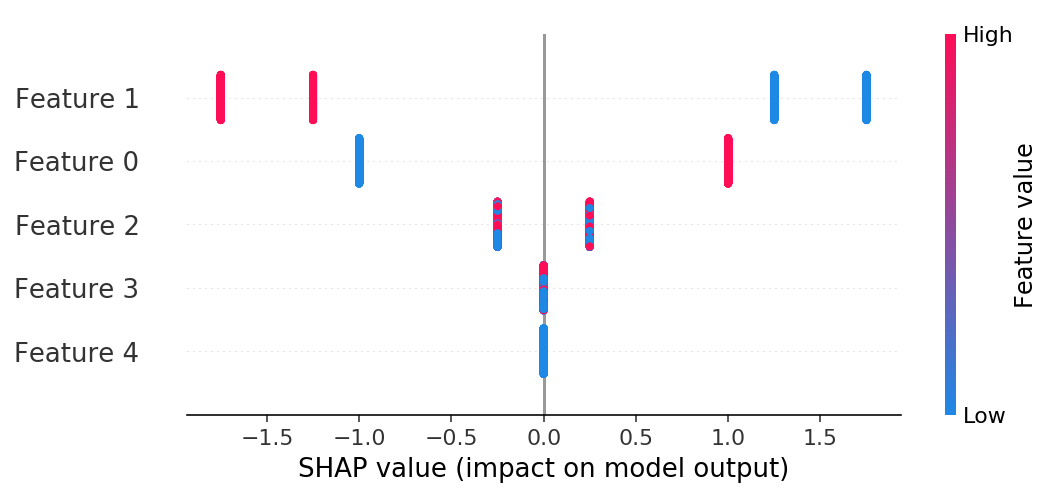

In [17]:
shap.summary_plot(shap_values, X)

In [18]:
# train a linear model
lr = linear_model.LinearRegression()
lr.fit(X, y)
lr_pred = lr.predict(X)
lr.coef_.round(2)

array([ 2., -3.,  0.,  0.,  0.])

In [19]:
# Note that the SHAP values no longer match the main effects because they now include interaction effects
main_effect_shap_values = lr.coef_ * (X - X.mean(0))
np.linalg.norm(shap_values - main_effect_shap_values)

15.8113893021767

### SHAP interaction values

In [20]:
# SHAP interaction contributions:
shap_interaction_values = explainer.shap_interaction_values(Xd)
shap_interaction_values[0].round(2)

array([[ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  , -1.5 ,  0.25, -0.  ,  0.  ],
       [ 0.  ,  0.25,  0.  ,  0.  ,  0.  ],
       [-0.  , -0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]], dtype=float32)

In [21]:
# ensure the SHAP interaction values sum to the marginal predictions
np.abs(shap_interaction_values.sum((1,2)) + explainer.expected_value - pred).max()

2.3841858e-07

In [22]:
# ensure the main effects from the SHAP interaction values match those from a linear model.
# while the main effects no longer match the SHAP values when interactions are present, they do match
# the main effects on the diagonal of the SHAP interaction value matrix
dinds = np.diag_indices(shap_interaction_values.shape[1])
total = 0
for i in range(N):
    for j in range(5):
        total += np.abs(shap_interaction_values[i,j,j] - main_effect_shap_values[i,j])
total

0.0005421147088888476

If we build a dependence plot for feature 0 we that it only takes two values and that these values are entirely dependent on the value of the feature (the value of feature 0 entirely determines it's effect because it has no interactions with other features).

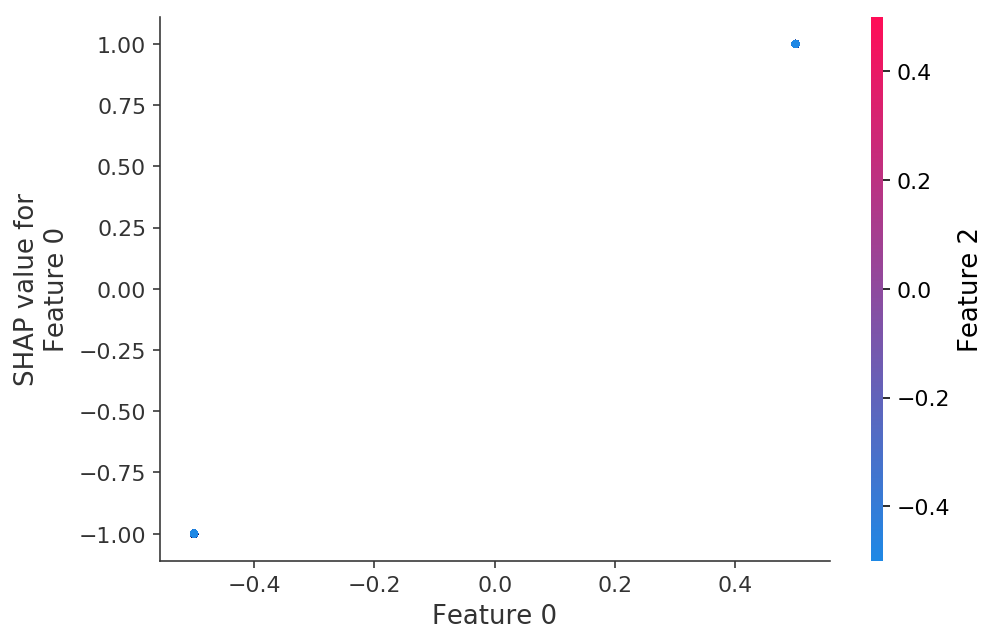

In [23]:
shap.dependence_plot(0, shap_values, X)

In contrast if we build a dependence plot for feature 2 we see that it takes 4 possible values and they are not entirely determined by the value of feature 2, instead they also depend on the value of feature 3. This vertical spread in a dependence plot represents the effects of non-linear interactions.

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


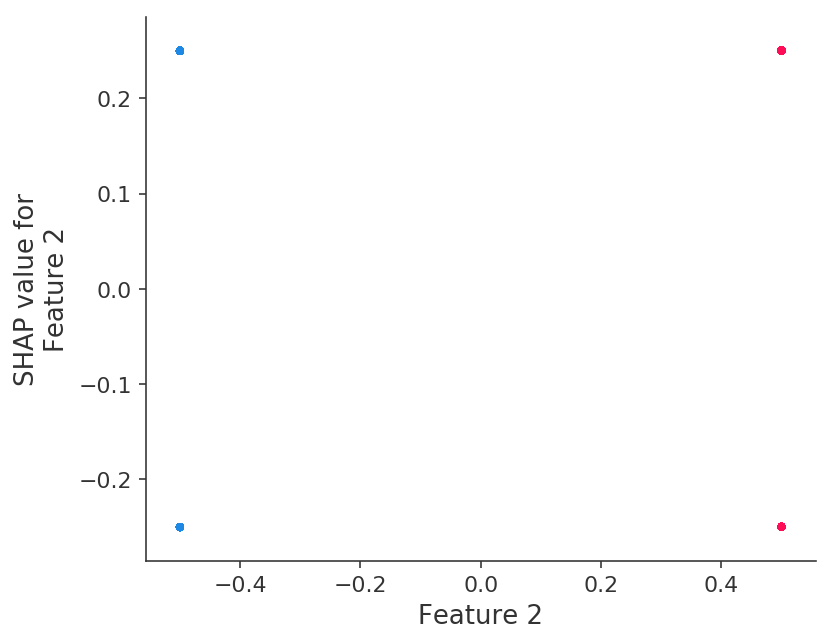

In [24]:
shap.dependence_plot(2, shap_values, X)